<h1>CNN model za prepoznavanje šalica</h1>
<hr/>
<h2>Iteracija Kilo</h2>

<p> Set slika je 700/100, Dropot-a i Data Augmentation i regularizacija</p>
<p>tetovi mijenjanja Learning Rate i batch size na itercaijama H1 i I2</p>

In [2]:
import os
import random

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, SpatialDropout2D

import matplotlib.pyplot as plt
import numpy as np

<h4>POstavljanje sjemena za ponavljanje rezultata:</h4>

In [17]:
seed = 77
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

<p>Postavljanje direktorija sa trening i validacijskim slikama:</p>

In [4]:
# Postavi direktorije slika
train_dir = "../../Projekt_slike_128/Trening"
test_dir = "../../Projekt_slike_128/Validacija"

<h3> Funkcija za određivanje broja epoha, veličinu batcheva i generiranje podataka</h3>

In [5]:
def generate_epochs_batchs_data():
    """ određivanje i priprema podataka """
    # Odredi broj epoha i veličinu batcheva
    num_of_epochs = input("Number of epochs:")
    num_of_epochs = int(num_of_epochs)
    size_of_batch = input("Batch size:")
    size_of_batch = int(size_of_batch)
    # Generator podataka sa augmentacijom za trening
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
    )
    test_datagen = ImageDataGenerator(rescale=1.0 / 255)

    train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
    )
    return(train_generator,test_generator, num_of_epochs, size_of_batch)

In [6]:
traintest_generators = generate_epochs_batchs_data()
train_generator = traintest_generators[0]
test_generator = traintest_generators[1]
num_of_epochs = traintest_generators[2]
size_of_batch = traintest_generators[3]

Number of epochs: 2
Batch size: 256


Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


<h3>Funkcija za plotanje rezultata </h3>

In [15]:
def plots_and_evaluation(history):
    """ funkcija za plotanje točnosti i gubitka  """
    # Plot trening i valuacija - točnost
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")

    # Plot trening i validacija - gubitak
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()

<p>Prikaz random primjera slika:</p>

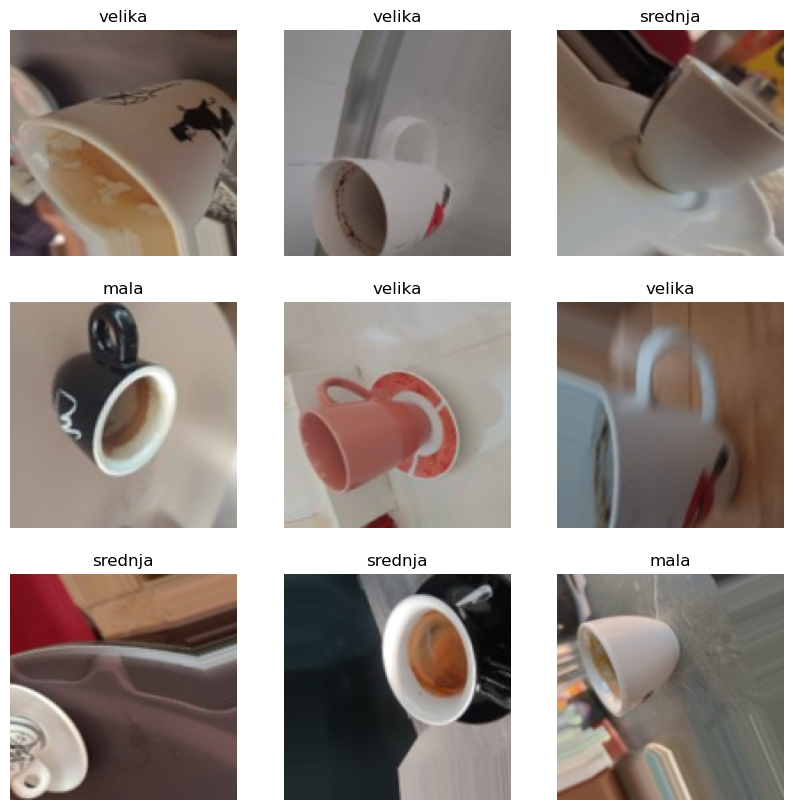

In [7]:
# Primjeri slika
def display_sample_images(generator):
    x, y = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        
        if (np.argmax(y[i])==0):
            plt.title("mala")
        if (np.argmax(y[i])==1):
            plt.title("srednja")
        if (np.argmax(y[i])==2):
            plt.title("velika")
        plt.axis("off")
    plt.show()


display_sample_images(train_generator)

<h2> Iteracija K.1</h2>
<p>ponavljanje H.1 iteracije</p>
<p> batch 128, epochs 100, parametri 3 000 000</p>
<p>leaning rate smanjen na 0.0005</p>

In [11]:
traintest_generators = generate_epochs_batchs_data()
train_generator = traintest_generators[0]
test_generator = traintest_generators[1]
num_of_epochs = traintest_generators[2]
size_of_batch = traintest_generators[3]

Number of epochs: 100
Batch size: 128


Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [12]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 spatial_dropout2d_6 (Spati  (None, 63, 63, 8)         0         
 alDropout2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                      

In [13]:
# Kompajliranje
optimizer=optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-24 17:35:21.303968: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/spatial_dropout2d_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 40s 2s/step - loss: 1.2233 - accuracy: 0.3504 - val_loss: 1.1109 - val_accuracy: 0.3398
Epoch 2/100
16/16 [==============================] - 33s 2s/step - loss: 1.1453 - accuracy: 0.3230 - val_loss: 1.1071 - val_accuracy: 0.3711
Epoch 3/100
16/16 [==============================] - 33s 2s/step - loss: 1.1125 - accuracy: 0.3489 - val_loss: 1.1080 - val_accuracy: 0.3438
Epoch 4/100
16/16 [==============================] - 34s 2s/step - loss: 1.1112 - accuracy: 0.3286 - val_loss: 1.1076 - val_accuracy: 0.3438
Epoch 5/100
16/16 [==============================] - 33s 2s/step - loss: 1.1083 - accuracy: 0.3428 - val_loss: 1.1078 - val_accuracy: 0.3203
Epoch 6/100
16/16 [==============================] - 33s 2s/step - loss: 1.1111 - accuracy: 0.3301 - val_loss: 1.1068 - val_accuracy: 0.3320
Epoch 7/100
16/16 [==============================] - 33s 2s/step - loss: 1.1041 - accuracy: 0.3453 - val_loss: 1.1056 - val_accuracy: 0.3281
Epoch 8/100
16/16 [======

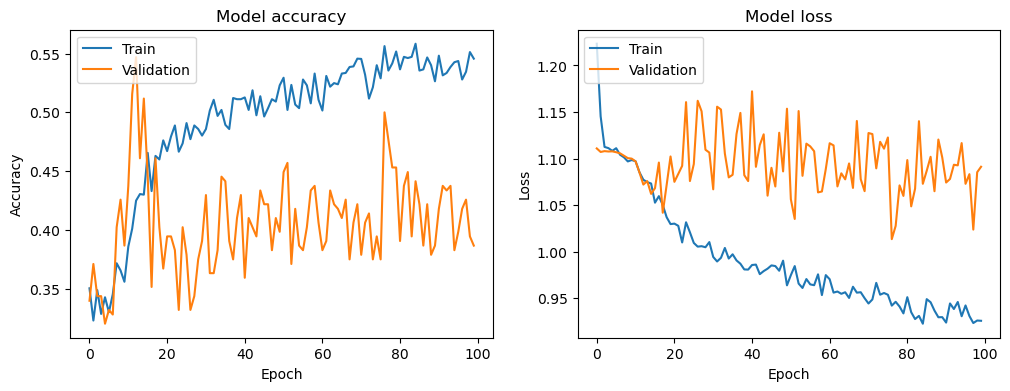

2/2 [==============================] - 1s 477ms/step - loss: 1.1065 - accuracy: 0.3750
Test accuracy: 0.375


In [16]:
#Plotovi
plots_and_evaluation(history)
# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2> Iteracija K.2</h2>
<p>ponavljanje H.1 iteracije</p>
<p> batch 128, epochs 100, parametri 3 000 000</p>
<p>leaning rate smanjen na 0.0009</p>

In [19]:
traintest_generators = generate_epochs_batchs_data()
train_generator = traintest_generators[0]
test_generator = traintest_generators[1]
num_of_epochs = traintest_generators[2]
size_of_batch = traintest_generators[3]

Number of epochs: 100
Batch size: 128


Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [20]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 8)         0         
 g2D)                                                            
                                                                 
 spatial_dropout2d_9 (Spati  (None, 63, 63, 8)         0         
 alDropout2D)                                                    
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                      

In [21]:
# Kompajliranje
optimizer=optimizers.Adam(learning_rate=0.0009)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-24 19:53:05.377940: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/spatial_dropout2d_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 39s 2s/step - loss: 1.2137 - accuracy: 0.3327 - val_loss: 1.1066 - val_accuracy: 0.3438
Epoch 2/100
16/16 [==============================] - 34s 2s/step - loss: 1.1169 - accuracy: 0.3530 - val_loss: 1.1080 - val_accuracy: 0.3125
Epoch 3/100
16/16 [==============================] - 33s 2s/step - loss: 1.1077 - accuracy: 0.3661 - val_loss: 1.1055 - val_accuracy: 0.3633
Epoch 4/100
16/16 [==============================] - 33s 2s/step - loss: 1.1023 - accuracy: 0.3849 - val_loss: 1.1016 - val_accuracy: 0.4727
Epoch 5/100
16/16 [==============================] - 33s 2s/step - loss: 1.0950 - accuracy: 0.3793 - val_loss: 1.0966 - val_accuracy: 0.5039
Epoch 6/100
16/16 [==============================] - 33s 2s/step - loss: 1.0824 - accuracy: 0.4168 - val_loss: 1.0916 - val_accuracy: 0.4570
Epoch 7/100
16/16 [==============================] - 33s 2s/step - loss: 1.0799 - accuracy: 0.4249 - val_loss: 1.0913 - val_accuracy: 0.3750
Epoch 8/100
16/16 [======

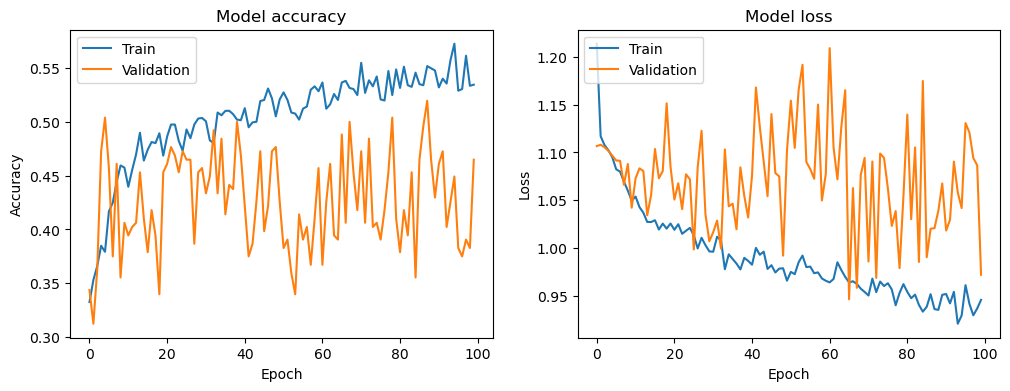

2/2 [==============================] - 1s 377ms/step - loss: 0.9606 - accuracy: 0.4883
Test accuracy: 0.48828125


In [22]:
#Plotovi
plots_and_evaluation(history)
# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2> Iteracija K.3</h2>

<p> batch 256, epochs 100, parametri 3 000 000</p>
<p>leaning rate smanjen na 0.0005</p>

In [24]:
traintest_generators = generate_epochs_batchs_data()
train_generator = traintest_generators[0]
test_generator = traintest_generators[1]
num_of_epochs = traintest_generators[2]
size_of_batch = traintest_generators[3]

Number of epochs: 100
Batch size: 256


Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [25]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 spatial_dropout2d_12 (Spat  (None, 63, 63, 8)         0         
 ialDropout2D)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                      

In [26]:
# Kompajliranje
optimizer=optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-24 21:13:20.671165: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/spatial_dropout2d_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 38s 4s/step - loss: 1.2284 - accuracy: 0.3395 - val_loss: 1.1124 - val_accuracy: 0.3516
Epoch 2/100
8/8 [==============================] - 34s 4s/step - loss: 1.1479 - accuracy: 0.3374 - val_loss: 1.1088 - val_accuracy: 0.3047
Epoch 3/100
8/8 [==============================] - 31s 4s/step - loss: 1.1285 - accuracy: 0.3416 - val_loss: 1.1074 - val_accuracy: 0.4961
Epoch 4/100
8/8 [==============================] - 31s 4s/step - loss: 1.1215 - accuracy: 0.3498 - val_loss: 1.1063 - val_accuracy: 0.5391
Epoch 5/100
8/8 [==============================] - 31s 4s/step - loss: 1.1105 - accuracy: 0.3698 - val_loss: 1.1066 - val_accuracy: 0.4570
Epoch 6/100
8/8 [==============================] - 31s 4s/step - loss: 1.1094 - accuracy: 0.3617 - val_loss: 1.1066 - val_accuracy: 0.3477
Epoch 7/100
8/8 [==============================] - 31s 4s/step - loss: 1.1080 - accuracy: 0.3688 - val_loss: 1.1062 - val_accuracy: 0.3555
Epoch 8/100
8/8 [======================

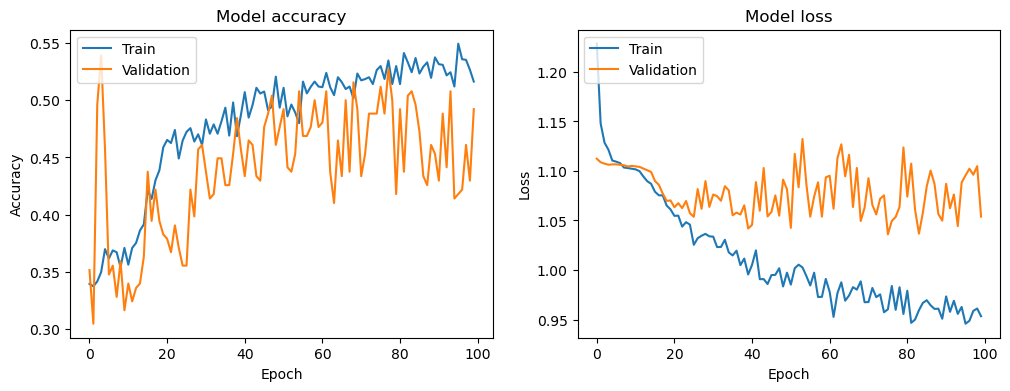

1/1 [==============================] - 1s 894ms/step - loss: 1.0609 - accuracy: 0.4922
Test accuracy: 0.4921875


In [27]:
#Plotovi
plots_and_evaluation(history)
# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2> Iteracija K.4</h2>

<p> batch 256, epochs 100, parametri 3 000 000</p>
<p>leaning rate smanjen na 0.0009</p>

In [29]:
traintest_generators = generate_epochs_batchs_data()
train_generator = traintest_generators[0]
test_generator = traintest_generators[1]
num_of_epochs = traintest_generators[2]
size_of_batch = traintest_generators[3]

Number of epochs: 100
Batch size: 256


Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [30]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(32, (3, 3), activation="relu"),
        
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 spatial_dropout2d_15 (Spat  (None, 63, 63, 8)         0         
 ialDropout2D)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                      

In [31]:
# Kompajliranje
optimizer=optimizers.Adam(learning_rate=0.0009)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-25 07:19:59.703089: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/spatial_dropout2d_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 38s 4s/step - loss: 1.3503 - accuracy: 0.3227 - val_loss: 1.1094 - val_accuracy: 0.3203
Epoch 2/100
8/8 [==============================] - 34s 4s/step - loss: 1.1556 - accuracy: 0.3174 - val_loss: 1.1081 - val_accuracy: 0.4141
Epoch 3/100
8/8 [==============================] - 31s 4s/step - loss: 1.1197 - accuracy: 0.3346 - val_loss: 1.1085 - val_accuracy: 0.3398
Epoch 4/100
8/8 [==============================] - 31s 4s/step - loss: 1.1091 - accuracy: 0.3433 - val_loss: 1.1075 - val_accuracy: 0.3555
Epoch 5/100
8/8 [==============================] - 31s 4s/step - loss: 1.1058 - accuracy: 0.3525 - val_loss: 1.1070 - val_accuracy: 0.3320
Epoch 6/100
8/8 [==============================] - 31s 4s/step - loss: 1.1098 - accuracy: 0.3476 - val_loss: 1.1062 - val_accuracy: 0.4648
Epoch 7/100
8/8 [==============================] - 30s 4s/step - loss: 1.1054 - accuracy: 0.3693 - val_loss: 1.1052 - val_accuracy: 0.5391
Epoch 8/100
8/8 [======================

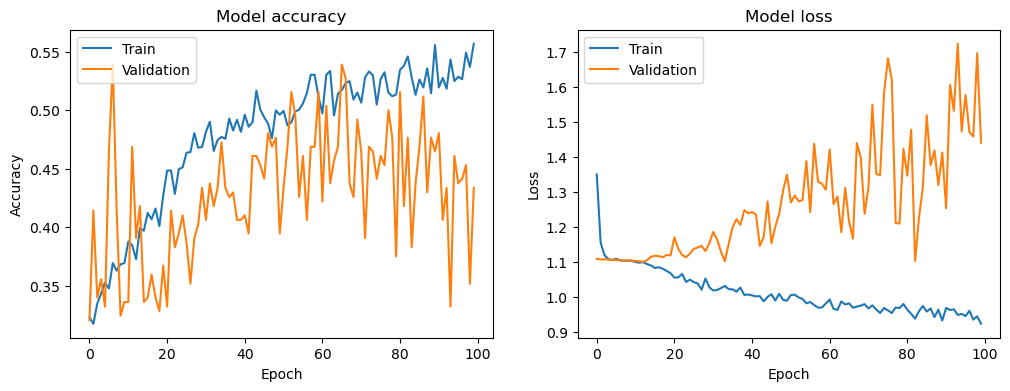

1/1 [==============================] - 1s 880ms/step - loss: 1.4003 - accuracy: 0.4336
Test accuracy: 0.43359375


In [32]:
#Plotovi
plots_and_evaluation(history)
# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>

<h2> Iteracija K.5</h2>
<p> Ponavljanje I.2 iteracije
<p> batch 128, epochs 100, parametri 3 000 000</p>
<p>learning rate smanje na 0.0005</p>


In [36]:
def generate_epochs_batchs_data():
    """ određivanje i priprema podataka """
    # Odredi broj epoha i veličinu batcheva
    num_of_epochs = input("Number of epochs:")
    num_of_epochs = int(num_of_epochs)
    size_of_batch = input("Batch size:")
    size_of_batch = int(size_of_batch)
    # Generator podataka sa augmentacijom za trening
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=50,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode="nearest",
    )
    test_datagen = ImageDataGenerator(rescale=1.0 / 255)

    train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
    )
    return(train_generator,test_generator, num_of_epochs, size_of_batch)

In [34]:
traintest_generators = generate_epochs_batchs_data()
train_generator = traintest_generators[0]
test_generator = traintest_generators[1]
num_of_epochs = traintest_generators[2]
size_of_batch = traintest_generators[3]

Number of epochs: 100
Batch size: 128


Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [37]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(32, (3, 3), activation="relu",  kernel_regularizer=l2(0.001)),
        SpatialDropout2D(0.5),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(128, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 spatial_dropout2d_22 (Spat  (None, 63, 63, 8)         0         
 ialDropout2D)                                                   
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                      

In [38]:
# Kompajliranje
optimizer=optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-25 08:24:59.367591: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/spatial_dropout2d_22/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 40s 2s/step - loss: 1.1683 - accuracy: 0.3342 - val_loss: 1.1217 - val_accuracy: 0.3906
Epoch 2/100
16/16 [==============================] - 33s 2s/step - loss: 1.1351 - accuracy: 0.3342 - val_loss: 1.1256 - val_accuracy: 0.4883
Epoch 3/100
16/16 [==============================] - 33s 2s/step - loss: 1.1281 - accuracy: 0.3580 - val_loss: 1.1249 - val_accuracy: 0.4258
Epoch 4/100
16/16 [==============================] - 33s 2s/step - loss: 1.1224 - accuracy: 0.3783 - val_loss: 1.1215 - val_accuracy: 0.3828
Epoch 5/100
16/16 [==============================] - 33s 2s/step - loss: 1.1097 - accuracy: 0.3849 - val_loss: 1.1096 - val_accuracy: 0.4531
Epoch 6/100
16/16 [==============================] - 33s 2s/step - loss: 1.1085 - accuracy: 0.3879 - val_loss: 1.1108 - val_accuracy: 0.3789
Epoch 7/100
16/16 [==============================] - 33s 2s/step - loss: 1.0967 - accuracy: 0.4300 - val_loss: 1.0966 - val_accuracy: 0.4062
Epoch 8/100
16/16 [======

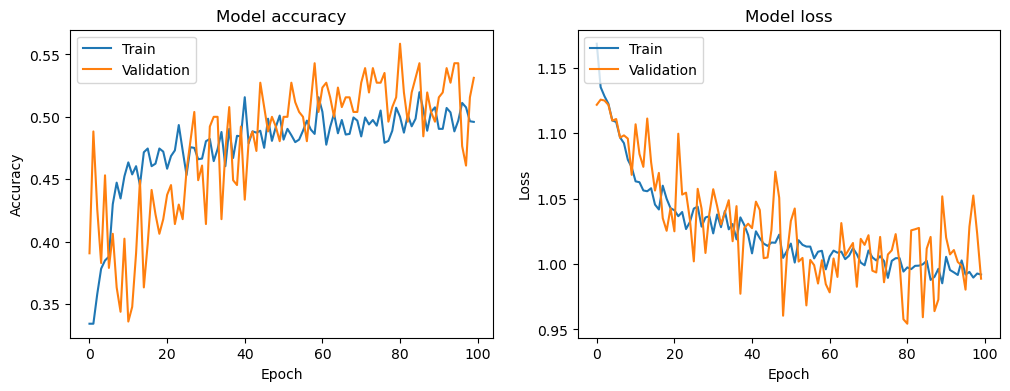

2/2 [==============================] - 1s 362ms/step - loss: 0.9763 - accuracy: 0.5508
Test accuracy: 0.55078125


In [39]:
#Plotovi
plots_and_evaluation(history)
# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<h2> Iteracija K.5</h2>
<p> Ponavljanje I.2 iteracije
<p> batch 128, epochs 100, parametri 3 000 000</p>
<p>learning rate smanje na 0.0009</p>


In [40]:
def generate_epochs_batchs_data():
    """ određivanje i priprema podataka """
    # Odredi broj epoha i veličinu batcheva
    num_of_epochs = input("Number of epochs:")
    num_of_epochs = int(num_of_epochs)
    size_of_batch = input("Batch size:")
    size_of_batch = int(size_of_batch)
    # Generator podataka sa augmentacijom za trening
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=50,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode="nearest",
    )
    test_datagen = ImageDataGenerator(rescale=1.0 / 255)

    train_generator = train_datagen.flow_from_directory(
        train_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
    )
    return(train_generator,test_generator, num_of_epochs, size_of_batch)

In [41]:
traintest_generators = generate_epochs_batchs_data()
train_generator = traintest_generators[0]
test_generator = traintest_generators[1]
num_of_epochs = traintest_generators[2]
size_of_batch = traintest_generators[3]

Number of epochs: 100
Batch size: 128


Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [42]:
# CNN model
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(16, (3, 3), activation="relu", kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Conv2D(32, (3, 3), activation="relu",  kernel_regularizer=l2(0.001)),
        SpatialDropout2D(0.5),
        MaxPooling2D((2, 2)),
        SpatialDropout2D(0.5),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(128, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 spatial_dropout2d_26 (Spat  (None, 63, 63, 8)         0         
 ialDropout2D)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                      

In [43]:
# Kompajliranje
optimizer=optimizers.Adam(learning_rate=0.0009)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/100


2024-08-25 09:27:52.301271: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/spatial_dropout2d_26/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 40s 2s/step - loss: 1.1965 - accuracy: 0.3545 - val_loss: 1.1237 - val_accuracy: 0.3555
Epoch 2/100
16/16 [==============================] - 33s 2s/step - loss: 1.1291 - accuracy: 0.3438 - val_loss: 1.1215 - val_accuracy: 0.3555
Epoch 3/100
16/16 [==============================] - 33s 2s/step - loss: 1.1223 - accuracy: 0.3555 - val_loss: 1.1210 - val_accuracy: 0.4102
Epoch 4/100
16/16 [==============================] - 33s 2s/step - loss: 1.1191 - accuracy: 0.3479 - val_loss: 1.1081 - val_accuracy: 0.5430
Epoch 5/100
16/16 [==============================] - 33s 2s/step - loss: 1.1052 - accuracy: 0.3879 - val_loss: 1.0900 - val_accuracy: 0.5156
Epoch 6/100
16/16 [==============================] - 33s 2s/step - loss: 1.0879 - accuracy: 0.4285 - val_loss: 1.0548 - val_accuracy: 0.5312
Epoch 7/100
16/16 [==============================] - 33s 2s/step - loss: 1.0696 - accuracy: 0.4457 - val_loss: 1.0408 - val_accuracy: 0.5469
Epoch 8/100
16/16 [======

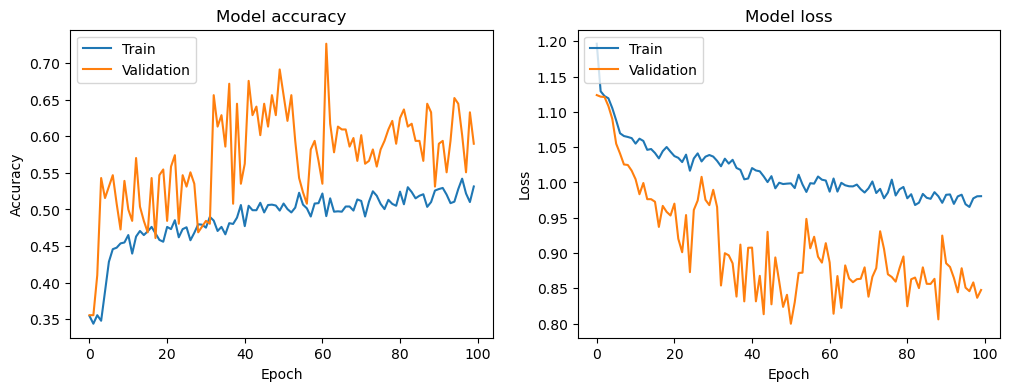

2/2 [==============================] - 1s 429ms/step - loss: 0.8426 - accuracy: 0.5977
Test accuracy: 0.59765625


In [44]:
#Plotovi
plots_and_evaluation(history)
# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)